### IMPORTING THE LIBRARIES

In [3]:
import numpy as np
import matplotlib.pyplot as pit
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns


### Reading the csv file

In [4]:
df = pd.read_csv('Facebook_Marketplace_data.csv')
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values


In [5]:
print(x)
print(y)

[[1 'video' '4/22/2018 6:00' ... nan nan nan]
 [2 'photo' '4/21/2018 22:45' ... nan nan nan]
 [3 'video' '4/21/2018 6:17' ... nan nan nan]
 ...
 [7048 'photo' '9/21/2016 23:03' ... nan nan nan]
 [7049 'photo' '9/20/2016 0:43' ... nan nan nan]
 [7050 'photo' '9/10/2016 10:30' ... nan nan nan]]
[nan nan nan ... nan nan nan]


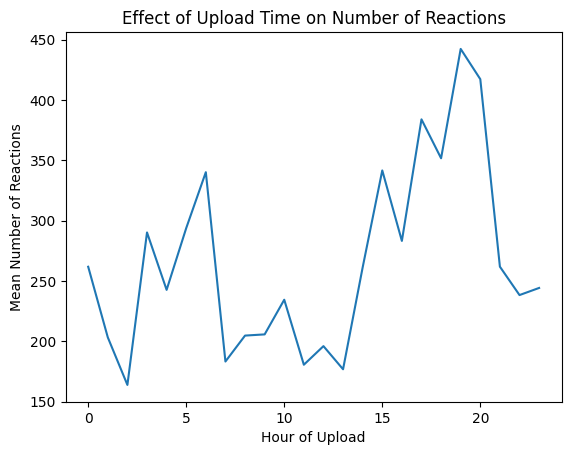

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# convert status_published to datetime format
df['status_published'] = pd.to_datetime(df['status_published'])

# extract hour of upload
df['hour'] = df['status_published'].dt.hour

# group by hour and calculate mean num_reactions
hourly_reactions = df.groupby('hour')['num_reactions'].mean()

# plot the results
plt.plot(hourly_reactions.index, hourly_reactions.values)
plt.xlabel('Hour of Upload')
plt.ylabel('Mean Number of Reactions')
plt.title('Effect of Upload Time on Number of Reactions')
plt.show()

###1. Is there a correlation between the number of reactions (num_reactions) and other engagement metrics such as comments (num_comments) and shares(num_shares)? If so, what is the strength and direction of this correlation?

               num_reactions  num_comments  num_shares
num_reactions       1.000000      0.150843    0.250723
num_comments        0.150843      1.000000    0.640637
num_shares          0.250723      0.640637    1.000000


<Axes: >

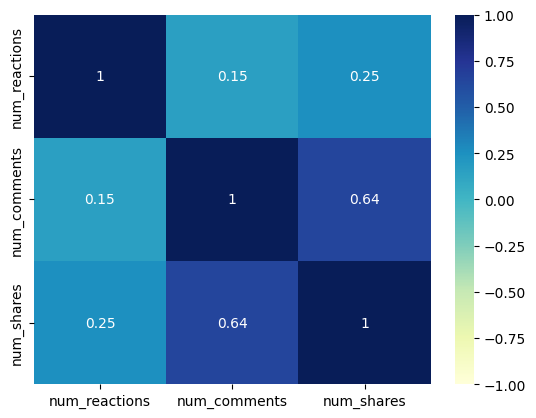

In [11]:
correlation_matrix = df[['num_reactions', 'num_comments', 'num_shares']].corr()

print(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', vmin=-1, vmax=1)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# select the columns for clustering
clustering_cols = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']

# one-hot encode the status_type column
status_type_encoder = LabelEncoder()
df['status_type_encoded'] = status_type_encoder.fit_transform(df['status_type'])

# add the encoded column to the clustering columns
clustering_cols.append('status_type_encoded')

# create a KMeans model with 5 clusters
kmeans = KMeans(n_clusters=5)

# fit the model to the data
kmeans.fit(df[clustering_cols])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

###2. Use the columns status_type, num_reactions, num_comments, num_shares, num_likes, num_loves, num_wows, num_hahas, num_sads, and num_angrys to train a K-Means clustering model on the Facebook Live Sellers dataset.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

[8645692195.2667, 4986397875.914613, 2735263885.7707467, 2000980738.663944, 1469929375.1750834, 1186926100.5944765, 923466988.6810515, 749948087.8106813, 622071959.5235165, 523198127.2451535]


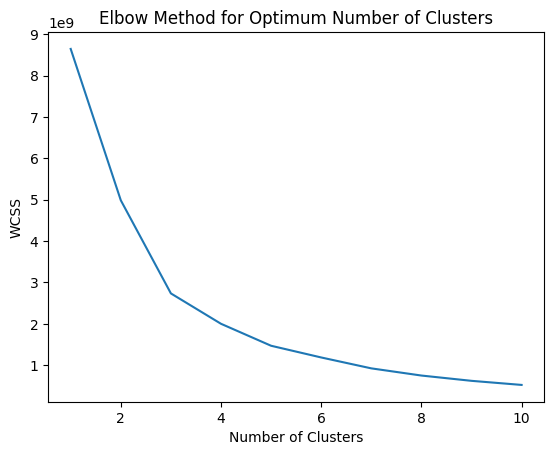

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# select the columns for clustering
WCSSE = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df[clustering_cols])
    WCSSE.append(kmeans.inertia_)
print(WCSSE)
# plot the elbow curve
plt.plot(K, WCSSE)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimum Number of Clusters')
plt.show()

###5. What is the count of different types of posts in the dataset?



In [ ]:
post_type_counts = df['status_type'].value_counts()
print(post_type_counts)

status_type
photo     4288
video     2334
status     365
link        63
Name: count, dtype: int64


###6. What is the average value of num_reaction, num_comments, num_shares for each post type?

In [ ]:
avg_engagement = df.groupby('status_type')[['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']].mean()
print(avg_engagement)

             num_reactions  num_comments  num_shares   num_likes  num_loves  \
status_type                                                                   
link            370.142857      5.698413    4.396825  369.619048   0.301587   
photo           181.290345     15.993470    2.553871  178.778451   1.445196   
status          438.783562     36.238356    2.558904  435.528767   1.561644   
video           283.409597    642.478149  115.679949  243.015424  35.540274   

             num_wows  num_hahas  num_sads  num_angrys  
status_type                                             
link         0.190476   0.031746  0.000000    0.000000  
photo        0.684701   0.190765  0.142491    0.045709  
status       1.172603   0.109589  0.386301    0.024658  
video        2.448158   1.735219  0.413882    0.254070  
